Part 1

In [ ]:
# import packages
import bs4
import requests
import pandas as pd
import numpy as np

# URL to scrape data from
url = 'https://web.archive.org/web/20201112015618/https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'

# send HTTP GET request to get url
response = requests.get(url)

# use BeautifulSoup to extract text from the page
from bs4 import BeautifulSoup

# parse the HTML content of the response using BeautifulSoup
soup = BeautifulSoup(response.content,'html5lib')

# use prettify to view the content
prettified_html = soup.prettify()

# find table within prettified content and save as a variable
table = soup.find('table')


# specify table to work with
dfs = pd.read_html(str(table))
df = dfs[0]

# set names for the table columns
df.columns = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the df
print(df.shape)
df.head(10)

(50, 8)


,rank,x_class,date,region,start_time,max_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


Part 2

In [ ]:
# dropping the last column of the data frame
df_no_movie = df.drop('movie', axis=1)

# convert date and time columns to datetime columns
df_no_movie['start_datetime'] = pd.to_datetime(df['date'] + ' ' + df['start_time'])
df_no_movie['maximum_datetime'] = pd.to_datetime(df['date'] + ' ' + df['max_time'])
df_no_movie['end_datetime'] = pd.to_datetime(df['date'] + ' ' + df['end_time'])

# drop the original date and time columns
datetime_df = df_no_movie.drop(['date', 'start_time', 'max_time', 'end_time'], axis=1)

# change order of columns to match example
reordered_df = datetime_df[['rank', 'x_class', 'start_datetime', 'maximum_datetime', 'end_datetime', 'region']]

# replace regions coded as - as missing (NaN)
reordered_df = reordered_df.replace('-', 'NaN')

print(reordered_df.shape)
reordered_df.head(10)

(50, 6)


,rank,x_class,start_datetime,maximum_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


Part 3

In [ ]:
# NASA link to scrape data from
url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'

# send HTTP GET request to get url
response = requests.get(url)

# parse the HTML content of the response using BeautifulSoup
soup = BeautifulSoup(response.content,'html5lib')
soup.prettify()

# find table and save as a variable
table = soup.find('pre')

# extract text from the parsed HTML
text = table.get_text()

# get rid of unneccessary information
# slice the list of substrings from the 11th element (inclusive) up to the 493th element (exclusive)
text = text.split('\n')[11:493]

# create a df and load in data
df = pd.DataFrame(text)

# split the data into 15 columns and add column names
df = df[0].apply(lambda x: pd.Series(x.split()))
df = df.drop([15, 16, 17, 18, 19, 20, 21, 22, 23], axis = 1)
df.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency',
              'flare_location', 'flare_region', 'flare_class', 'cme_date', 'cme_time', 'cme_angle',
              'cme_width', 'cme_speed', 'plot']

print(df.shape)
df.head(10)

(482, 15)


,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_date,cme_time,cme_angle,cme_width,cme_speed,plot
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
5,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227,PHTX
6,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352,PHTX
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,PHTX
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,PHTX
9,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441,PHTX


Part 4

In [ ]:
# replace regions coded as - as missing (NaN)

# flare_location column
df['flare_location'].replace('------', 'NaN', inplace=True)
# flare_region column
df['flare_region'].replace('-----', 'NaN', inplace=True)
# flare_classification column
df['flare_class'].replace('----', 'NaN', inplace=True)
# cme_date
df['cme_date'].replace('--/--', 'NaN', inplace=True)
# cme_time
df['cme_time'].replace('--:--', 'NaN', inplace=True)
# cme_angle
df['cme_angle'].replace('----', 'NaN', inplace=True)
# cme_width
df['cme_width'].replace('----', 'NaN', inplace=True)
df['cme_width'].replace('---', 'NaN', inplace=True)
# cme_speed
df['cme_speed'].replace('----', 'NaN', inplace=True)

# create a new column indicating whether the row corresponds to a halo flare or not
df['is_halo'] = df['cme_angle'].apply(lambda x: True if x == 'Halo' else False)

# replace 'Halo' entries in the cme_angle column with NA
df['cme_angle'].replace('Halo', 'NA', inplace=True)

# function to check if a string contains '>'
def check_greater_than(entry):
    if '>' in entry:
        return True
    else:
        return False

# create a new column to indicate if cmd_width is a lower bound and apply the function to the 'cme_width' column
df['width_lower_bound'] = df['cme_width'].apply(lambda x: check_greater_than(x))

# replace '>' with '' in column 'cme_width'
df['cme_width'] = df['cme_width'].str.replace('>', '')

In [ ]:
# prevent errors with time notation
df['end_time'].replace('24:00', '00:00', inplace = True)

In [ ]:
# adding the year to end_date and cme_date columns
for row in range(len(df)):
  parts = df.iloc[row, 0].split('/') # split the string in the start_date column by '/'
  df.iloc[row, 2] = f'{parts[0]}/{df.iloc[row, 2]}' # update the date in the end_date column
  df.iloc[row, 9] = f'{parts[0]}/{df.iloc[row, 9]}' # update the date in the cme_date column

# combine start_date and start_time
df['start_datetime'] = pd.to_datetime(df['start_date'] + ' ' + df['start_time'])

# initialize end_datetime and cme_datetime columns
df['end_datetime'] = ""
df['cme_datetime'] = ""

In [ ]:
# reordering columns in the data frame
new_order = ['end_date', 'end_time', 'start_datetime', 'end_datetime', 'start_frequency',
      'end_frequency', 'flare_location', 'flare_region', 'flare_class',
      'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed', 'is_halo', 'width_lower_bound', 'plot', 'cme_datetime']

df = df[new_order]

# populating end_datetime column by combining end_date and end_time
for row in range(0, len(df)):
  h = df.values[row][1].split(":")
  if (int(h[0]) < 24):
    df.iat[row, 3] = df.values[row][0].replace('/', '-') + ' ' + df.values[row][1] + ':00'

# reordering columns in the data frame
new_order = ['cme_date', 'cme_time', 'end_date', 'cme_datetime', 'end_time', 'start_datetime', 'end_datetime', 'start_frequency',
      'end_frequency', 'flare_location', 'flare_region', 'flare_class',
             'cme_angle', 'cme_width', 'cme_speed', 'is_halo', 'width_lower_bound', 'plot']

df = df[new_order]

In [ ]:
# populating cme_datetime column by combining cme_date and cme_time
for row in range(0, len(df)):
    if df.values[row][0] != 'NaN' and df.values[row][1] != 'NaN':  # check if both date and time are not 'NaN' strings
        h = df.values[row][1].split(":")
        if (int(h[0]) < 24):
            df.iat[row, 3] = df.values[row][0].replace('/', '-') + ' ' + df.values[row][1] + ':00'

In [ ]:
# drop the original date and time columns
clean_df = df.drop(['cme_date', 'cme_time', 'end_date', 'end_time'], axis=1)

# reorder columns to match example
columns = ['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency',
           'flare_location', 'flare_region', 'flare_class', 'cme_datetime',
             'cme_angle', 'cme_width', 'cme_speed', 'plot', 'is_halo', 'width_lower_bound']

clean_df = clean_df[columns]

# input NaN for blank cme_datetime
clean_df['cme_datetime'].replace('                   ', 'NaN', inplace=True)

print(clean_df.shape)
clean_df.head(10)

(482, 14)


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NA,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False


Analysis Part 2

In [ ]:
# question 1 replication

# filter rows containing 'X' in the 'flare_class' column
replication_df = clean_df[clean_df['flare_class'].str.contains('X')]

# remove 'X' from every row in 'flare_class'
replication_df['flare_class'] = df['flare_class'].str.replace('X', '')

# convert data in flare_class to float
replication_df['flare_class'] = replication_df['flare_class'].astype(float)

# sort the data in flare_class in descending order
replication_df = replication_df.sort_values('flare_class', ascending=False)

# only display top 50 rows
replication_df = replication_df.head(50)
print(replication_df.shape)
replication_df.head(10)


(50, 14)


<ipython-input-48-50217393c351>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replication_df['flare_class'] = df['flare_class'].str.replace('X', '')
<ipython-input-48-50217393c351>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replication_df['flare_class'] = replication_df['flare_class'].astype(float)


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,28.0,2003-11-04 19:54:00,NA,360,2657,PHTX,True,False
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,17.0,2003-10-28 11:30:00,NA,360,2459,PHTX,True,False
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,10.0,2003-10-29 20:54:00,NA,360,2029,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,9.0,,NaN,NaN,NaN,PHTX,False,False
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,8.3,2003-11-02 17:30:00,NA,360,2598,PHTX,True,False
288,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,7.1,2005-01-20 06:54:00,NA,360,882,PHTX,True,False
359,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,6.9,2011-08-09 08:12:00,NA,360,1610,PHTX,True,False


The table replicated using NASA data is fairly different from the table from Spaceweatherlive.com. The NASA table doesn't contain some rows of data that are present on the other table, and also generally has less precise values for flare_class.

In [ ]:
# question 2 integration

# create a new column rank in the replication_df data frame
replication_df['rank'] = 0

# Convert data type of 'flare_region' column in replication_df to int
replication_df['flare_region'] = replication_df['flare_region'].astype(int)


# for x_class column in reordered_df: removing letters and symbols and converting to float
reordered_df['x_class'] = reordered_df['x_class'].replace('[^\d.]', '', regex=True).astype(float)


# iterate over the two dataframes to see if the flare class and flare region match in both data frames
for index1, row_reordered in reordered_df.iterrows():
    for index2, row_replication in replication_df.iterrows():
        if row_reordered['region'] == int(row_replication['flare_region']) and row_reordered['x_class'] == row_replication['flare_class']:
            replication_df.loc[index2, 'rank'] = row_reordered['rank']

print(replication_df.shape)
replication_df.head(10)

(50, 15)


,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_class,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound,rank
240,2003-11-04 20:00:00,2003-11-04 00:00:00,10000,200,S19W83,10486,28.0,2003-11-04 19:54:00,NA,360,2657,PHTX,True,False,0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,20.0,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,2
233,2003-10-28 11:10:00,2003-10-29 00:00:00,14000,40,S16E08,10486,17.0,2003-10-28 11:30:00,NA,360,2459,PHTX,True,False,0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,14.0,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,0
234,2003-10-29 20:55:00,2003-10-29 00:00:00,11000,500,S15W02,10486,10.0,2003-10-29 20:54:00,NA,360,2029,PHTX,True,False,0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,9.4,1997-11-06 12:10:00,NA,360,1556,PHTX,True,False,7
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,9.0,,NaN,NaN,NaN,PHTX,False,False,0
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,8.3,2003-11-02 17:30:00,NA,360,2598,PHTX,True,False,0
288,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,7.1,2005-01-20 06:54:00,NA,360,882,PHTX,True,False,0
359,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,6.9,2011-08-09 08:12:00,NA,360,1610,PHTX,True,False,0


I'm definining best matching rows across the 2 datasets as rows that have the same flare class and flare region. This isn't a perfect method to find matching rows as there were more matching rows than were actually found.

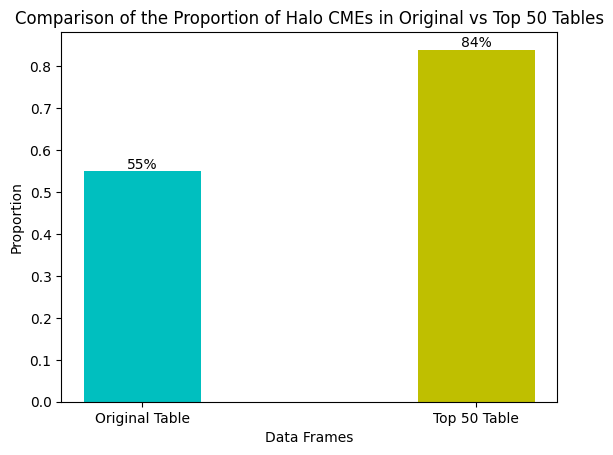

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the clean_df and replication_df DataFrames

# Calculate proportions
clean_proportions = clean_df['is_halo'].value_counts(normalize=True)
replication_proportions = replication_df['is_halo'].value_counts(normalize=True)

# Create bar plot with two bars
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions = np.arange(len(clean_proportions))

# Plotting bars
bars = plt.bar(bar_positions, [clean_proportions[True], replication_proportions[True]],
               bar_width, label='is_halo', color=['c', 'y'])

# Adding labels, title, and legend
plt.xlabel('Data Frames')
plt.ylabel('Proportion')
plt.title('Comparison of the Proportion of Halo CMEs in Original vs Top 50 Tables')
plt.xticks(bar_positions, ['Original Table', 'Top 50 Table'])

# Adding percentages on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.0%}",
             ha='center', va='bottom')

# Display plot
plt.show()


I made a barplot that compares the proportion of Halo CMEs in the original table vs. the top 50 table. There is a larger proportion of Halo CMEs in the top 50 table ~84% than in the original table ~55%.  

Since the barplot displays the proportion of the result of a binary question, whether a solar flare had a Halo CME or not, we can clearly see that for the top 50 table, solar flares are more likely to have a Halo CME and there is less variation in this dataset. On the other hand, the original table is just over 50%, showing that there is more variation in this parameter in this dataset.

To interpret the plot further and generalize it to variance, because the top 50 table was specifically curated to contain the 50 solar flares with the highest flare class, it has less variance and there is strong covariance between the magnitude of flare class and the occurrence of Halo CMEs.